In [26]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import mdtraj
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

## Structural ensemble of the unfolded state of the N-terminal SH3 domain of Drk (1-59)
#### In this analysis we are going to compare the structural ensemble of the unfolded state of the N-terminal SH3 domain of Drk (1-59):

#### **X-EISD (PED00156):** This ensemble was obtained using the X-EISD (eXtended Ensemble Importance Sampling with Drift) approach from a random pool of conformations generated through TraDES (Transient Dynamics and Ensemble Sampling). X-EISD is an advanced sampling technique used to explore the conformational space of biological molecules.

#### **idpGAN (PED00456):** This ensemble was obtained using the idpGAN (Intrinsically Disordered Protein Generative Adversarial Network) machine learning model. idpGAN is an artificial intelligence model specifically designed to generate conformations of intrinsically disordered proteins, such as the N-terminal SH3 domain of Drk (1-59).

The differences between X-EISD and idpGAN:

X-EISD utilizes molecular dynamics and ensemble sampling to explore the conformational space of biological molecules. It relies on physical principles, requires significant computational power, and produces a set of meaningful conformations.

idpGAN is a deep learning model that generates conformations of intrinsically disordered proteins based on input data. It does not rely on physical principles but learns from data and can generate conformations more quickly after training.

Comparing the two methods could reveal differences in conformational behavior and provide a better understanding of protein structural characteristics.

#### Alpha carbon

In [3]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00456']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}

In [4]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00456.dcd.
- Found 1000 conformations.


In [5]:
trajectories= pipeline.trajectories
trajectories

{'PED00156': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x133a6a300>,
 'PED00456': <mdtraj.Trajectory with 1000 frames, 939 atoms, 59 residues, without unitcells at 0x133535df0>}

### Alpha Carbon coordinates

In [7]:
ca_xyz_dict=dict_coord(trajectories)

### Distance matrix and visualization

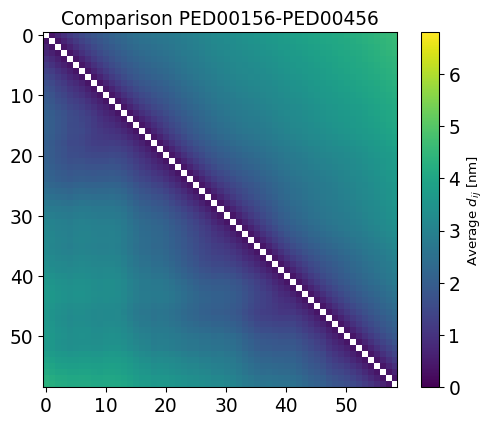

In [8]:
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)
plot_average_dmap_comparison(distance_matrix_dict['PED00156'],distance_matrix_dict['PED00456'],'Comparison PED00156-PED00456')

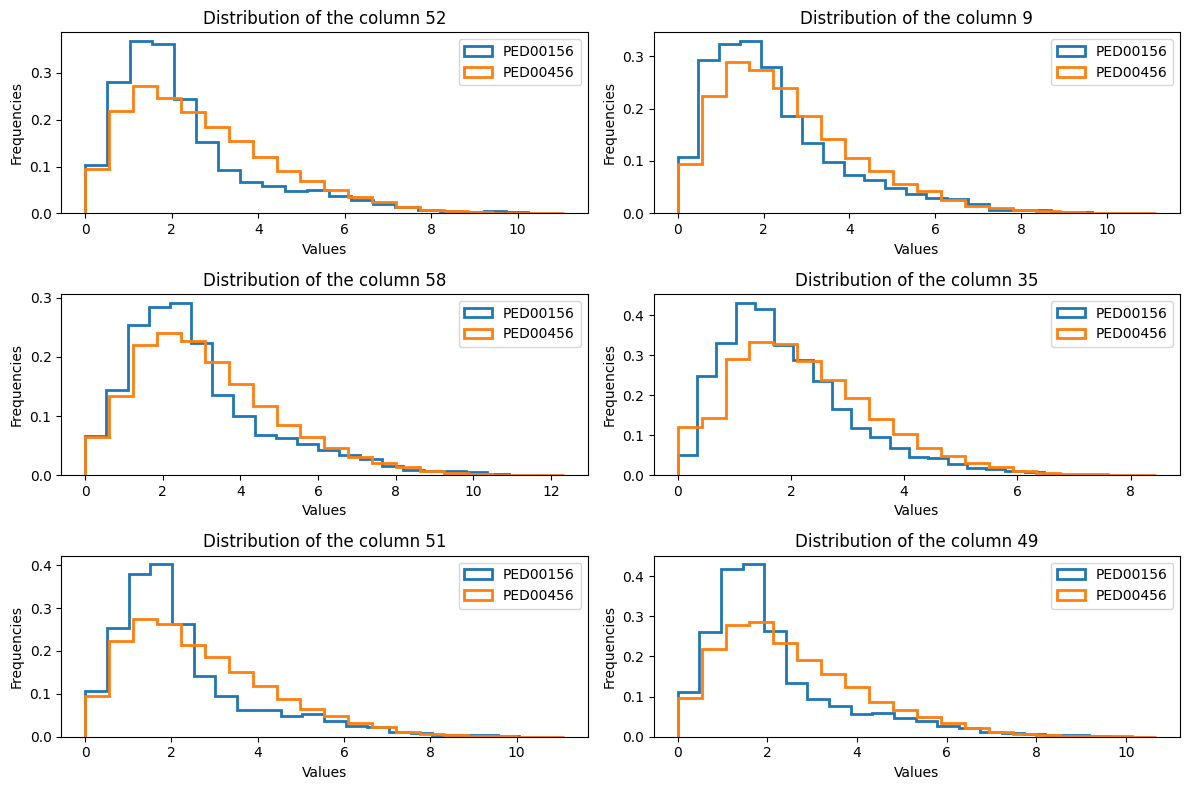

In [9]:
import random
# Determine the total number of columns available in your data
total_num_columns = len(distance_matrix_dict[next(iter(distance_matrix_dict))][0][0])
# Select 6 columns randomly
selected_columns = random.sample(range(total_num_columns), 6)

num_row = (len(selected_columns) + 1) // 2
num_col = 2
fig, axs = plt.subplots(num_row, num_col, figsize=(12, 8))

if num_row == 1 and num_col == 1:
    axs = np.array([[axs]])

for i, res in enumerate(selected_columns):
    row = i // num_col
    col = i % num_col
    ax = axs[row, col]

    for prot, matrix in distance_matrix_dict.items():
        column_values = matrix[:, :, res].flatten()  
        ax.hist(column_values, bins=20, density=True, histtype='step', linewidth=2, label=prot)  
    ax.set_title(f"Distribution of the column {res}")
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequencies")
    ax.legend()

for i in range(len(selected_columns), num_row * num_col):
    row = i // num_col
    col = i % num_col
    ax = axs[row, col]
    ax.axis('off')

plt.tight_layout()
plt.show()


### Contact map and visualization

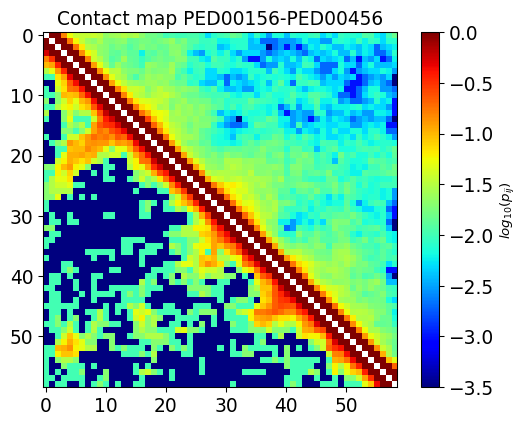

In [10]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)
plot_cmap_comparison(contact_map_dict['PED00156'],contact_map_dict['PED00456'],'Contact map PED00156-PED00456')

### Distribution

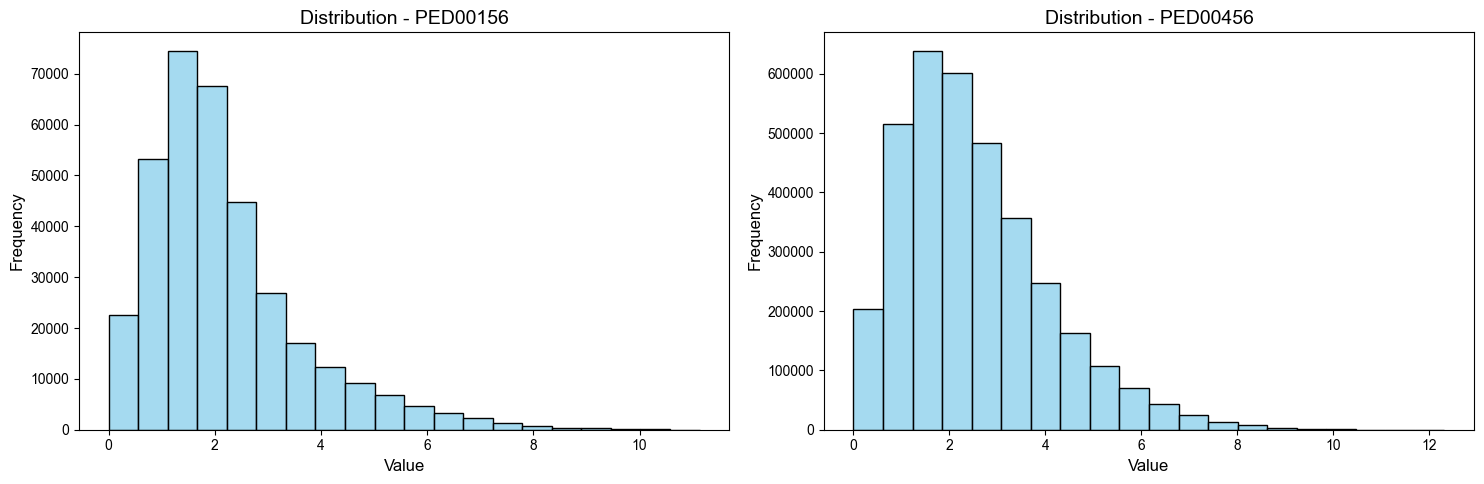

In [11]:
flattened_dict=flatten_matrices(distance_matrix_dict)
plot_flattened_data(flattened_dict)

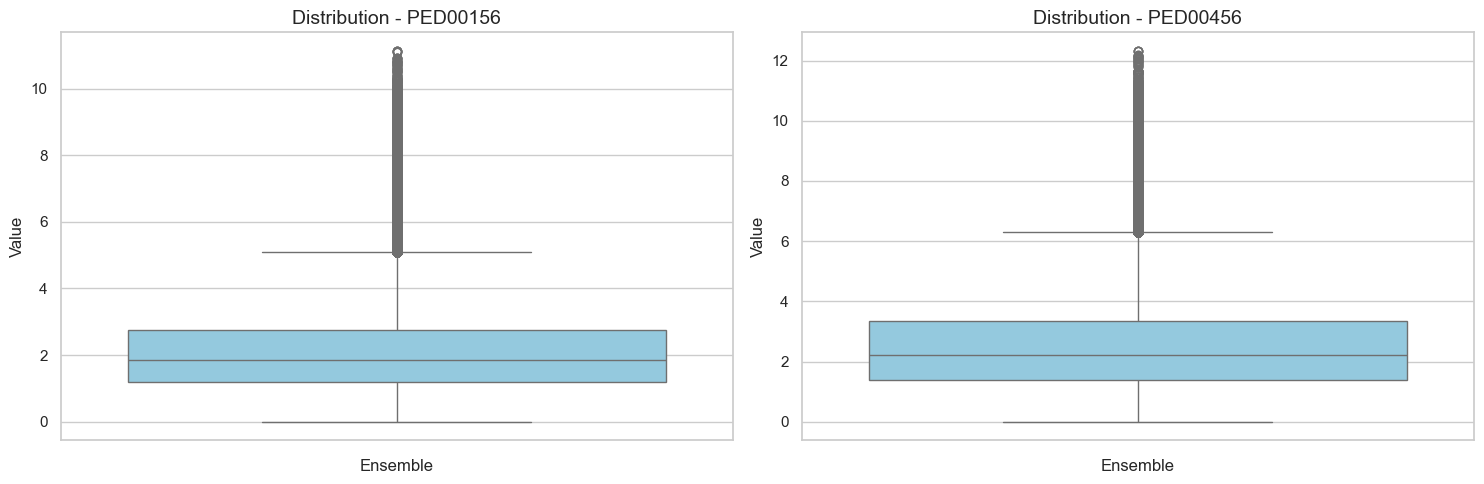

In [15]:
plot_boxplot(flattened_dict)

# Angles analysis-Phi and Psi angles

In [13]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00456']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)
trajectories_angles= pipeline.trajectories

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00456.dcd.
- Found 1000 conformations.


In [14]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)

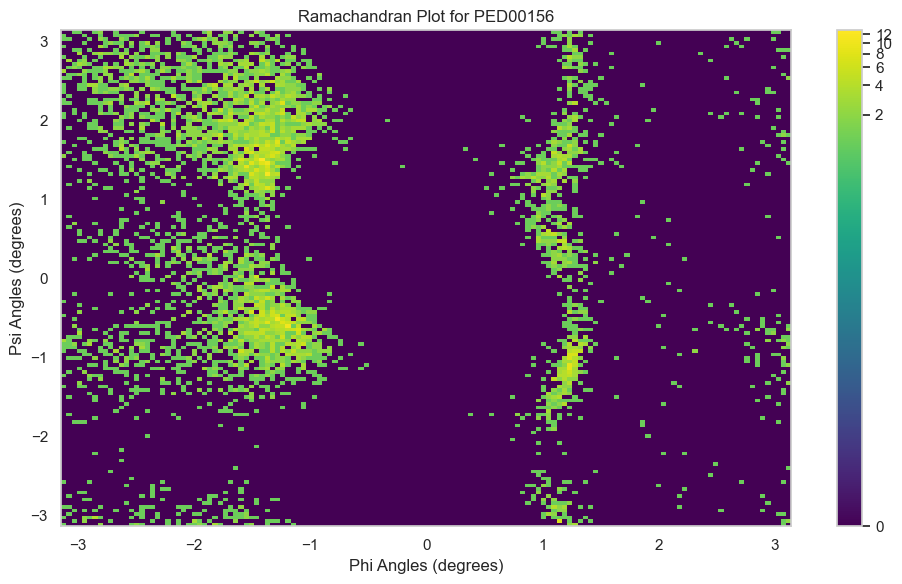

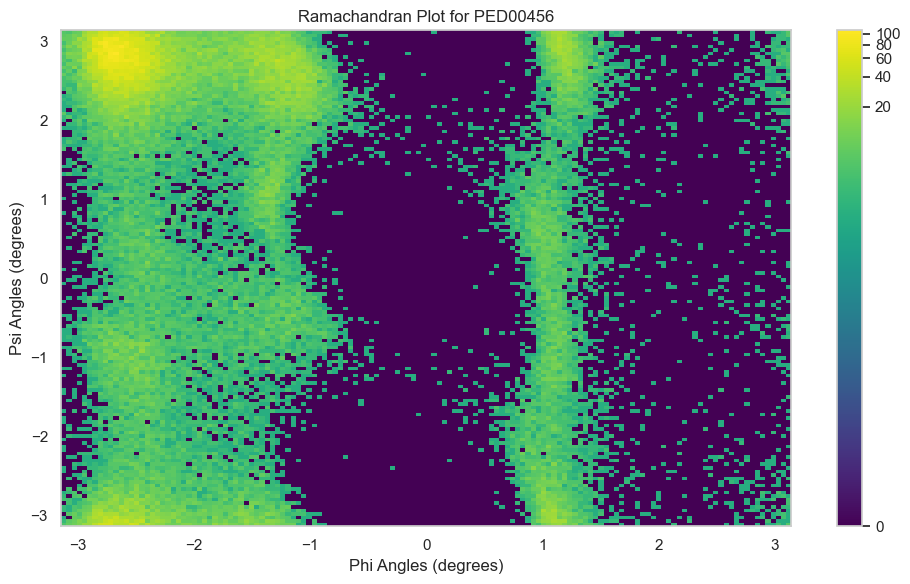

In [15]:
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)

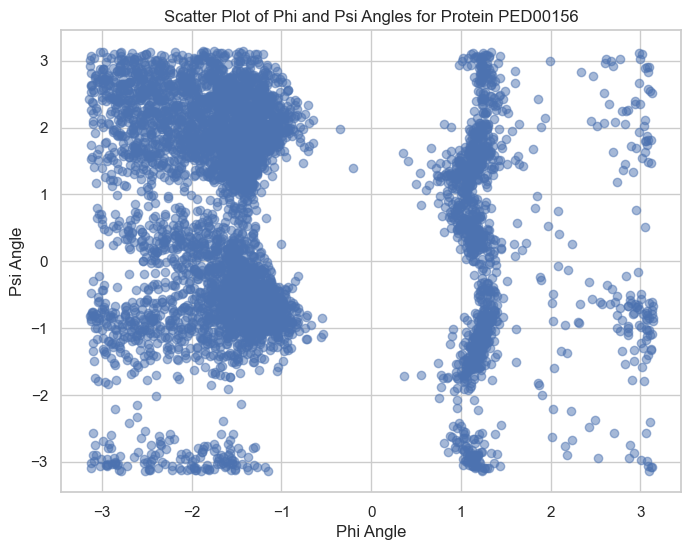

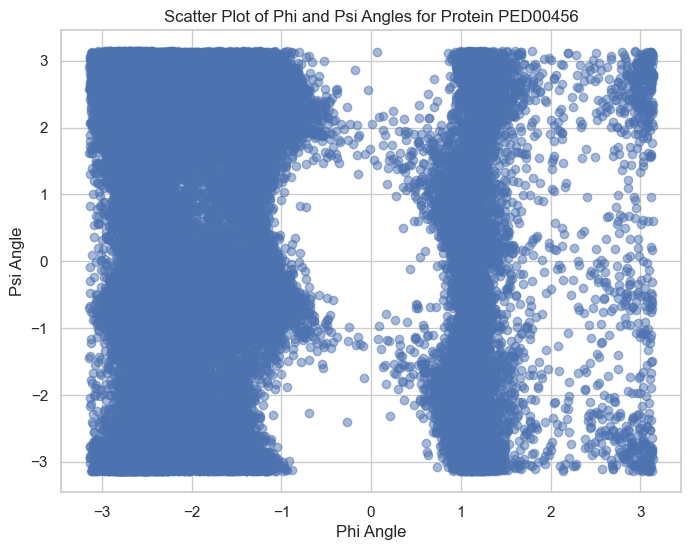

In [16]:
scatter_plot_phi_psi(dict_phi_psi_splitted)

In [13]:
#four_consecutive_indices_Calpha=consecutive_4_indices_of_Calpha(trajectories_angles)
#plot_distribution_dihedral_angles(trajectories_angles,four_consecutive_indices_Calpha)

## Global analysis
### Radius-of-gyration

In [20]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00456']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}

pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00456.dcd.
- Found 1000 conformations.


In [30]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)
Rgs_dict


{'PED00156': array([1.24959029, 1.29641417, 1.21872177, 1.18298375, 1.21931347,
        1.26808079, 1.47284365, 1.27054796, 1.49910212, 1.26700358,
        1.30895595, 1.2676808 , 1.27908538, 1.24442872, 1.39225983,
        1.26095355, 1.18291842, 1.35188062, 1.43702699, 1.31328133,
        1.22986491, 1.44400999, 1.43669051, 1.54010842, 1.64585366,
        1.55759418, 1.44637492, 1.49406681, 1.40407895, 1.44715848,
        1.39739263, 1.67832706, 1.33202003, 1.79544566, 1.34481353,
        1.3277099 , 1.98504197, 1.74192989, 1.40578962, 2.14868095,
        2.14427047, 1.436506  , 2.27435337, 2.21166296, 2.13031069,
        2.65039335, 2.37276799, 2.46739123, 1.5067792 , 1.68280386,
        2.0393619 , 1.73860432, 1.46929494, 2.13183052, 2.03793199,
        1.74739253, 2.10510751, 1.93671337, 1.22175679, 1.14806449,
        1.88778398, 2.03348982, 2.08575287, 2.39411819, 2.62738542,
        2.6989855 , 2.63143052, 1.20969899, 2.84482916, 2.29315725,
        2.83202449, 2.98683092, 2.33

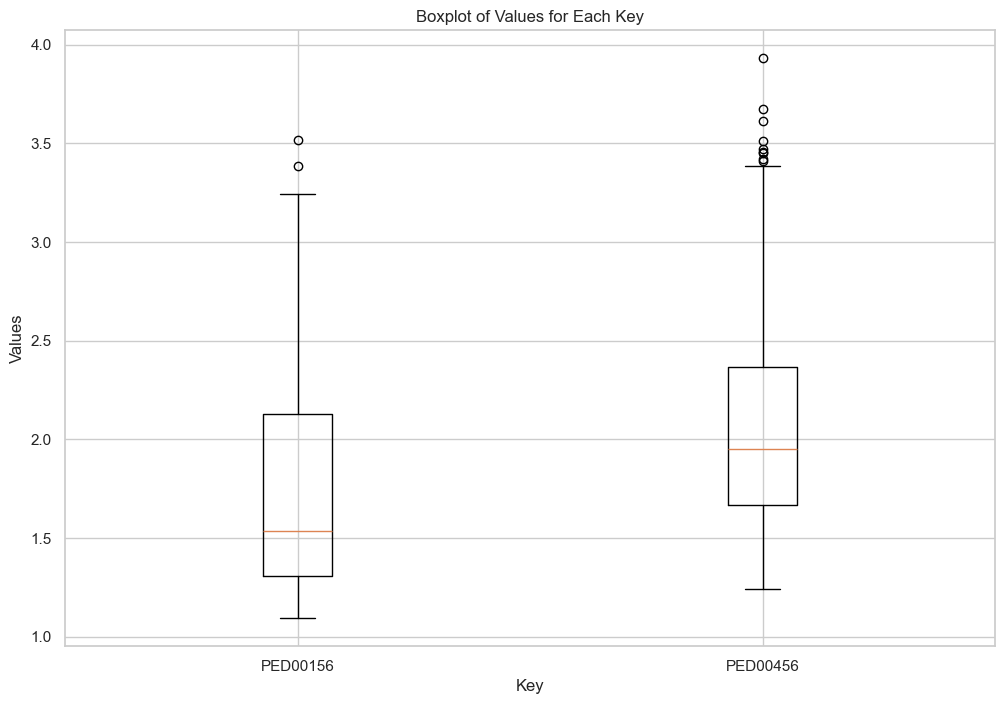

In [31]:
#plot_distribution_of_Rgs(Rgs_dict)
plt.figure(figsize=(12, 8))
plt.boxplot(Rgs_dict.values(), labels=Rgs_dict.keys())
plt.xlabel('Key')
plt.ylabel('Values')
plt.title('Boxplot of Values for Each protein')
plt.show()

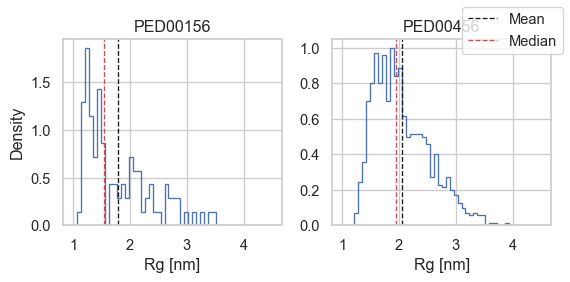

In [23]:
plot_rg_comparison(Rgs_dict)

### Alpha-helix content

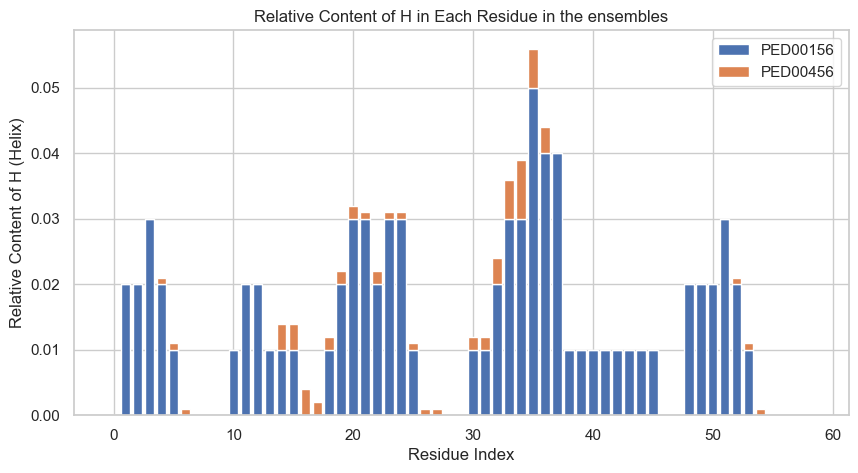

In [24]:
dssp_dict=get_dssp_dict(trajectories)
plot_relative_helix_content_multiple_proteins(dssp_dict)

## Site specific order parameter

In [28]:
def plot_o_i(dict_o_i):
    fig = go.Figure()
    for key, o_i in dict_o_i.items():
        position = list(range(o_i.shape[0])) 
        trace = go.Scatter(x=position, y=o_i, mode='markers', name=key)
        fig.add_trace(trace)
    layout = go.Layout(
        title='Site-specific order parameter',
        xaxis=dict(title='Position'),
        yaxis=dict(title='Value', range=[0.2, 0.3]),
        width=1000,
        height=600
    )
    fig.update_layout(layout)
    fig.add_shape(type="line", x0=0, y0=0.1906, x1=len(position), y1=0.1906, line=dict(color="black", width=2))
    fig.show()
dict_o_i = site_specific_order_parameter(ca_xyz_dict)
plot_o_i(dict_o_i)


###

### Site specific flexibility parameter

In [29]:
def featurize_phi_psi_dict(traj_dict, get_names=False):
    featurized_traj_dict = {}
    for traj_key, traj in traj_dict.items():
        atoms = list(traj.topology.atoms)
        phi_ids, phi = mdtraj.compute_phi(traj)
        psi_ids, psi = mdtraj.compute_psi(traj)
        phi_psi = np.concatenate([phi, psi], axis=1)
        if get_names:
            names = []
            for t in phi_ids:
                names.append(repr(atoms[t[1]].residue) + "-PHI")
            for t in psi_ids:
                names.append(repr(atoms[t[0]].residue) + "-PSI")
            featurized_traj_dict[traj_key] = (phi_psi, names)
        else:
            featurized_traj_dict[traj_key] = phi_psi
    return featurized_traj_dict
def split_phipsi_and_delate_lastphi_fristpsi_data(dictionary):
    phi_psi_separated = {}
    for key, value in dictionary.items():
        split_index = value.shape[1] // 2
        phi_array, psi_array = np.split(value, [split_index], axis=1)
        array_phi = np.delete(phi_array, -1, axis=1)
        array_psi = np.delete(psi_array, 0, axis=1)
        phi_psi_separated[key] = [array_phi, array_psi]
    return phi_psi_separated
phi_psi_separated = split_phipsi_and_delate_lastphi_fristpsi_data(featurize_phi_psi_dict(trajectories_angles))
def specific_site_flexibility_parameter(phi_psi_separated):
    f = {}
    for key, (phi_array, psi_array) in phi_psi_separated.items():
        Rsquare_phi =  np.square(np.mean(np.cos(phi_array), axis=0)) + np.square(np.mean(np.sin(phi_array), axis=0))
        Rsquare_psi = np.square(np.mean(np.cos(psi_array), axis=0)) + np.square(np.mean(np.sin(psi_array), axis=0))
        f_i = np.round(1 - (1/2 * np.sqrt(Rsquare_phi)) - (1/2 * np.sqrt(Rsquare_psi)), 5)
        f[key] = f_i
    return f
flexibility_parameter=specific_site_flexibility_parameter(phi_psi_separated)
def plot_scatter(flexibility_paramet):
    fig = go.Figure()
    for key, val in flexibility_paramet.items():
        position = list(range(val.shape[0])) 
        trace = go.Scatter(x=position, y=val, mode='markers', name=key)
        fig.add_trace(trace)
    
    layout = go.Layout(
        title='Site-specific flexiblity parameter',
        xaxis=dict(title='Position'),
        yaxis=dict(title='Value',range=[0.4,1]),
        width=1000,
        height=600
    )
    fig.update_layout(layout)
    fig.show()
plot_scatter(flexibility_parameter)